# Project: Hypothesis Testing with Men's and Women's Soccer Matches

![A soccer pitch for an international match.](soccer-pitch2.jpg)

## Context

We’re working as sports journalists at a major online sports media company, specializing in soccer analysis and reporting. After years of watching both men’s and women’s international soccer matches, our gut instinct tells us that more goals are scored in women’s international football matches than in men’s. This could make for a compelling investigative article that our subscribers are bound to enjoy, but to validate our hunch, we’ll need to perform a proper statistical hypothesis test.

While planning this project, we recognize that the game has evolved significantly over the years, and scoring patterns can vary depending on the tournament. To maintain consistency and reliability, we decide to narrow our analysis to official FIFA World Cup matches only (excluding qualifiers), and only those played since 2002-01-01.

We’ve have two datasets containing the results of every official men’s and women’s international football match dating back to the 19th century, which we scraped from a reliable online source. This data is stored in two CSV files: women_results.csv and men_results.csv.

## The key question we aim to answer is:

Are more goals scored in women’s international soccer matches than in men’s?

We adopt a 10% significance level for our hypothesis test and set up the following hypotheses:

### $H_0$: The mean number of goals scored in women’s international soccer matches is the same as in men’s.

### $H_A$: The mean number of goals scored in women’s international soccer matches is greater than in men’s.

-----------------

# Code part

## Imports:

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.stats import shapiro

## Read data

In [2]:
wom = pd.read_csv("women_results.csv")
men = pd.read_csv("men_results.csv")

In [3]:
wom.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [4]:
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [5]:
#concat with marker
wom["group"] = "women"
men["group"] = "men"
df = pd.concat([men, wom], ignore_index=True)
df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group
0,0,1872-11-30,Scotland,England,0,0,Friendly,men
1,1,1873-03-08,England,Scotland,4,2,Friendly,men
2,2,1874-03-07,Scotland,England,2,1,Friendly,men
3,3,1875-03-06,England,Scotland,2,2,Friendly,men
4,4,1876-03-04,Scotland,England,3,0,Friendly,men


## 🧹 Data Cleaning & Filtering

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49237 entries, 0 to 49236
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  49237 non-null  int64 
 1   date        49237 non-null  object
 2   home_team   49237 non-null  object
 3   away_team   49237 non-null  object
 4   home_score  49237 non-null  int64 
 5   away_score  49237 non-null  int64 
 6   tournament  49237 non-null  object
 7   group       49237 non-null  object
dtypes: int64(3), object(5)
memory usage: 3.0+ MB


In [7]:
# null check
df.isna().sum()

Unnamed: 0    0
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
group         0
dtype: int64

We have no nulls in data

Filter according to conditions and create total goals column

In [8]:
df = df[(df["tournament"] == "FIFA World Cup") & (df["date"] > "2002-01-01")] 
df["goals_scored"] = df["home_score"] + df["away_score"]
df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,men,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,men,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,men,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,men,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,men,1


##  📊 Exploratory Data Analysis (EDA)

Show basic stats: mean, median, std, count of goals for each group

In [14]:
df.groupby("group")["goals_scored"].agg(["std", "mean", "median", "count"])

,std,mean,median,count
group,,,,
men,1.652544,2.513021,2.0,384
women,2.022387,2.980000,3.0,200


So we see that women have greater mean then man, but is it statistically significant?

Plot distributions (histogram with kde, boxplot) of total goals for men vs women

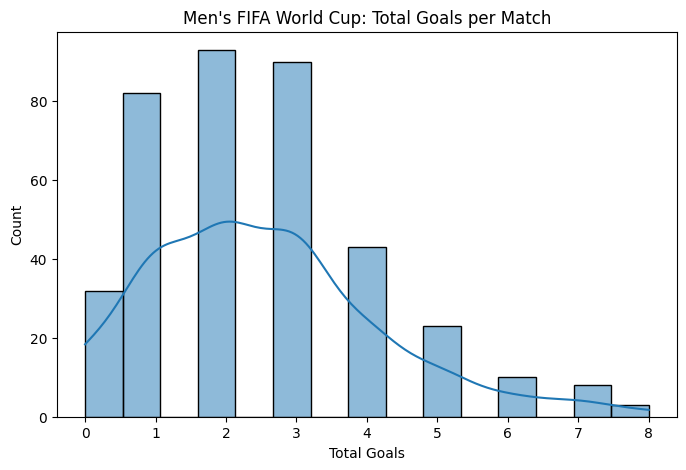

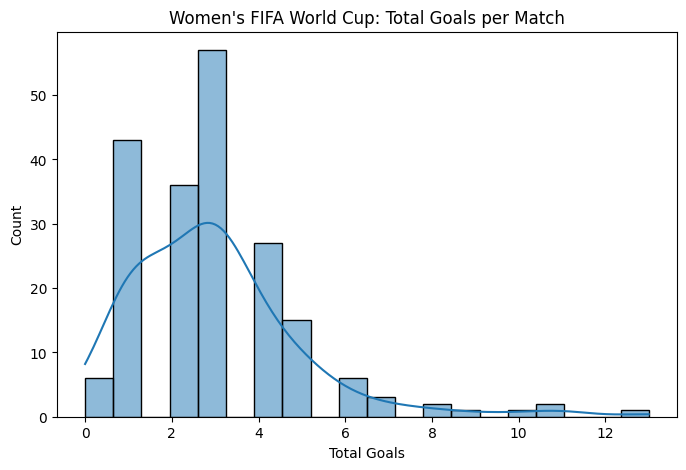

In [48]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df[df["group"] == "men"], x = "goals_scored", kde = True)
plt.title("Men's FIFA World Cup: Total Goals per Match")
plt.xlabel('Total Goals')
plt.ylabel('Count')

plt.figure(figsize=(8, 5))
sns.histplot(data=df[df["group"] == "women"], x = "goals_scored", kde = True)
plt.title("Women's FIFA World Cup: Total Goals per Match")
plt.xlabel('Total Goals')
plt.ylabel('Count')


plt.show()

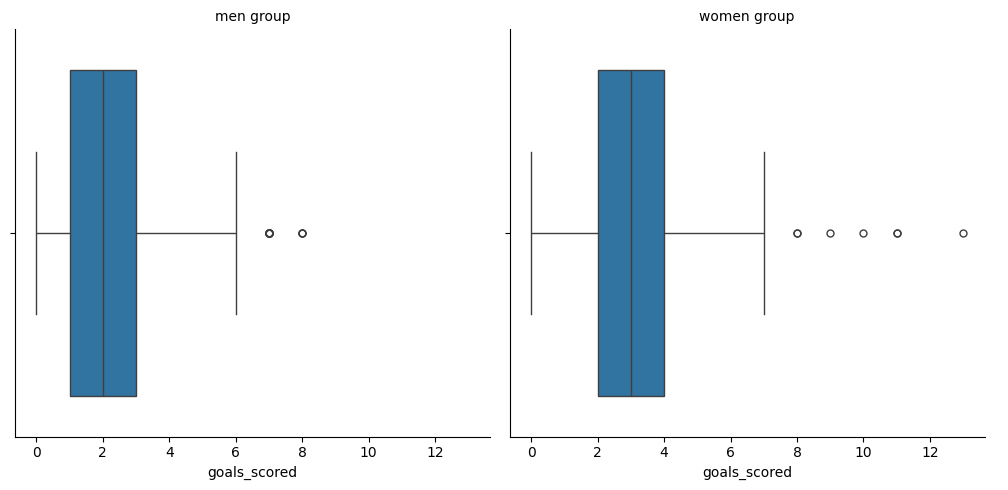

In [50]:
g = sns.catplot(data=df, x = "goals_scored", col = "group", kind = "box")
g.set_titles("{col_name} {col_var}")
plt.show()

The distributions of total goals in FIFA World Cup matches since 2002 show that women's matches tend to have a wider range and more frequent high-scoring games than men's. While the central tendency is similar, the right tail in the women's distribution suggests that extreme goal outcomes are more likely — a key indicator in support of our hypothesis.

Also we see that is distribution is right-skewed

## Hypothesis Testing

After histogram its hard to call distribution normal, but lets check 

Check for normality (Shapiro-Wilk test)

In [53]:
print(shapiro(df[df["group"] == "men"]["goals_scored"]))
print(shapiro(df[df["group"] == "women"]["goals_scored"]))

ShapiroResult(statistic=np.float64(0.9266493059134338), pvalue=np.float64(8.894989197030093e-13))
ShapiroResult(statistic=np.float64(0.8491019332746058), pvalue=np.float64(3.8908293844628985e-13))


In both shapiro tests we have very low pvalue, so we can reject H0 and tell that both data is not normal, so we have to do Mann-Whitney U тест

In [54]:
#for Mann-Whitney we have to make pivot data
pv = df.pivot(columns = "group", values = "goals_scored")
pv.head()

group,men,women
25164,1.0,NaN
25165,8.0,NaN
25166,2.0,NaN
25167,3.0,NaN
25168,1.0,NaN


Alpha = 0.1

In [55]:
a = 0.1


Mann-Whitney U тест

In [56]:
test = pg.mwu(x = pv["women"], y = pv["men"], alternative = "greater")
test

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,0.126901,0.563451


In [62]:
p = test["p-val"].iloc[0]
if p <= a:
    result = "reject"
else:
    result = "fail to reject"

print(f"p-value: {p:.5f} → {result} the null hypothesis.")

p-value: 0.00511 → reject the null hypothesis.


p-value: 0.00511 is less then 0.1 → reject the null hypothesis.

# ✅ Conclusion

Our investigation set out to answer whether more goals are scored in women’s FIFA World Cup matches than in men’s, using official match data since January 1, 2002.

After preprocessing the data, visualizing the distributions, and testing for normality with the Shapiro-Wilk test, we found that the number of goals in both men’s and women’s matches does not follow a normal distribution. As a result, we used the Mann–Whitney U test, a non-parametric alternative, to compare the two groups.

Using a one-sided test at a 10% significance level, our results showed a p-value of 0.00511, which leads us to reject the null hypothesis. This provides statistical evidence to support the claim that:

Women's FIFA World Cup matches tend to have more goals than men's matches on average.

This finding aligns with visual observations from the distributions — women’s matches not only had a slightly higher peak in goals but also a heavier right tail, indicating more frequent high-scoring games.